In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

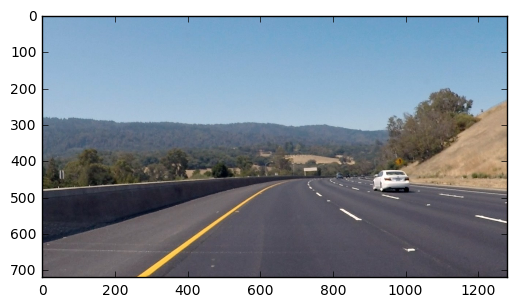

In [2]:
img = mpimg.imread("curved-lane.jpg")
plt.imshow(img)

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

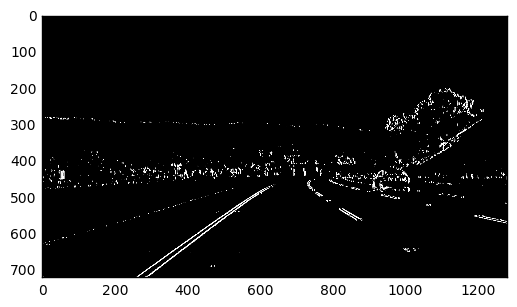

In [8]:
abs_sobelx = np.absolute(sobelx)
abs_sobely = np.absolute(sobely)

abs_sobelxy = np.absolute(sobelx)

scaled_sobelx = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
scaled_sobely = np.uint8(255*abs_sobely/np.max(abs_sobely))

thresh_min = 20
thresh_max = 100

sxbinaryx = np.zeros_like(scaled_sobelx)
sxbinaryy = np.zeros_like(scaled_sobely)

sxbinaryx[(scaled_sobelx >= thresh_min) & (scaled_sobelx <= thresh_max)] = 1
plt.imshow(sxbinaryx, cmap='gray')



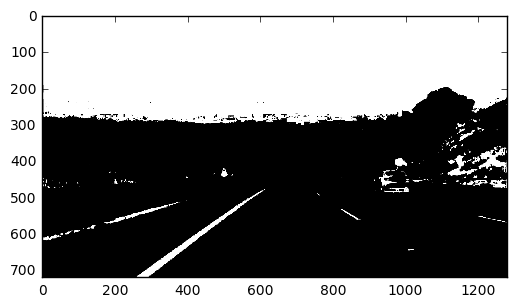

In [15]:
# Define a function that thresholds the S-channel of HLS
def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
    return binary_output

hls_binary = hls_select(img, thresh=(90, 255))
plt.imshow(hls_binary, cmap='gray')



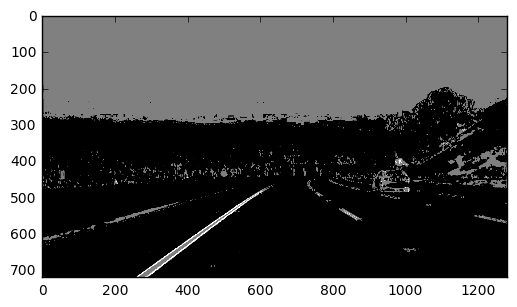

In [16]:
final = hls_binary + sxbinaryx
plt.imshow(final, cmap='gray')